In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
current_pwd = os.getcwd()

possible_paths = [
    '/home/export/soheuny/SRFinder/soheun/notebooks', 
    '/home/soheuny/HH4bsim/soheun/notebooks'
]
    
assert os.getcwd() in possible_paths, f"Did you change the path? It should be one of {possible_paths}"
os.chdir("..")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import torch

from plots import hist_events_by_labels
from events_data import EventsData
from fvt_classifier import FvTClassifier


features = [
    "sym_Jet0_pt", "sym_Jet1_pt", "sym_Jet2_pt", "sym_Jet3_pt",
    "sym_Jet0_eta", "sym_Jet1_eta", "sym_Jet2_eta", "sym_Jet3_eta",
    "sym_Jet0_phi", "sym_Jet1_phi", "sym_Jet2_phi", "sym_Jet3_phi",  
    "sym_Jet0_m", "sym_Jet1_m", "sym_Jet2_m", "sym_Jet3_m",
]

In [12]:
import pandas as pd

n_3b = 1_000_000
experiment_name = "counting_test_v2"
df = pd.read_csv(f"./data/tsv/tst_results_summary_{experiment_name}_n_3b={n_3b}_mi_test.tsv", sep="\t")

In [13]:
from tst_info import TSTInfo

experiment_name = "counting_test_v2"
n_3b = 1_000_000

hparam_filter = {
    "experiment_name": experiment_name,
    "n_3b": n_3b,
}

hashes = TSTInfo.find(hparam_filter)
tst_info = TSTInfo.load(hashes[0])
print({"n_3b": tst_info.hparams["n_3b"], "4b_in_SR": tst_info.hparams["SRCR"]["4b_in_SR"]})

sig_level = 0.05
df["reject_null_auc_permutation"] = df["p_value_auc_permutation"] < sig_level
df["reject_null_mce_permutation"] = df["p_value_mce_permutation"] < sig_level
df["reject_null_auc_bootstrap"] = df["p_value_auc_bootstrap"] < sig_level
df["reject_null_mce_bootstrap"] = df["p_value_mce_bootstrap"] < sig_level

print("Permutation test -- AUC")
display(df.groupby(["signal_ratio"])["reject_null_auc_permutation"].mean())
print("Permutation test -- MCE")
display(df.groupby(["signal_ratio"])["reject_null_mce_permutation"].mean())
print("Bootstrap test -- AUC")
display(df.groupby(["signal_ratio"])["reject_null_auc_bootstrap"].mean())
print("Bootstrap test -- MCE")
display(df.groupby(["signal_ratio"])["reject_null_mce_bootstrap"].mean())

{'n_3b': 1000000, '4b_in_SR': 0.2}
Permutation test -- AUC


signal_ratio
0.00    0.10
0.01    0.16
0.02    0.70
Name: reject_null_auc_permutation, dtype: float64

Permutation test -- MCE


signal_ratio
0.00    0.11
0.01    0.12
0.02    0.55
Name: reject_null_mce_permutation, dtype: float64

Bootstrap test -- AUC


signal_ratio
0.00    0.10
0.01    0.16
0.02    0.71
Name: reject_null_auc_bootstrap, dtype: float64

Bootstrap test -- MCE


signal_ratio
0.00    0.12
0.01    0.12
0.02    0.54
Name: reject_null_mce_bootstrap, dtype: float64

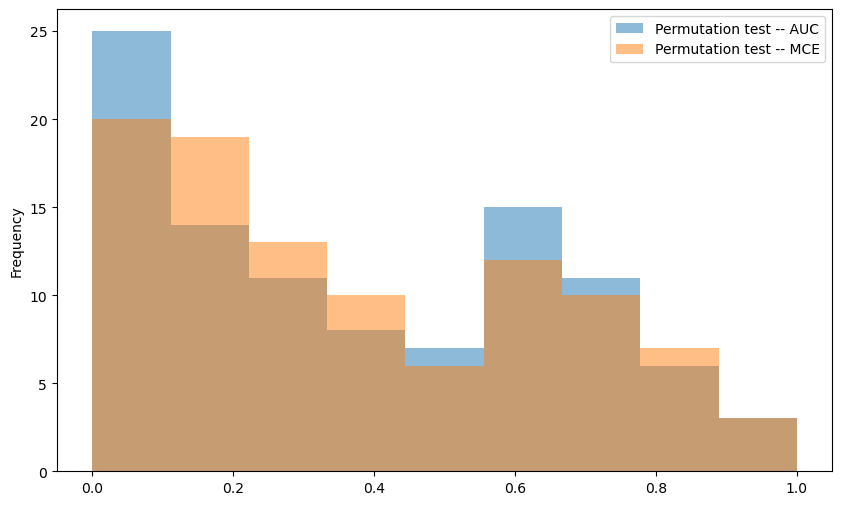

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
df_s0 = df[df["signal_ratio"] == 0.01]
bins = np.linspace(0, 1, 10)
plt.hist(df_s0["p_value_auc_permutation"], bins=bins, alpha=0.5, label="Permutation test -- AUC")
plt.hist(df_s0["p_value_mce_permutation"], bins=bins, alpha=0.5, label="Permutation test -- MCE")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [15]:
from tst_info import TSTInfo

experiment_name = "counting_test_high_4b_in_CR"
n_3b = 1_400_000

hparam_filter = {
    "experiment_name": experiment_name,
    "n_3b": n_3b,
}

hashes = TSTInfo.find(hparam_filter)
tst_info = TSTInfo.load(hashes[0])
print({"n_3b": tst_info.hparams["n_3b"], "4b_in_SR": tst_info.hparams["SRCR"]["4b_in_SR"]})



sig_level = 0.05

df_list = []
for i in range(5):
    df_name = f"./data/tsv/tst_results_summary_{experiment_name}_n_3b={n_3b}_mi_test_seed={10 * i}_to_{10 * (i + 1)}.tsv"
    if os.path.exists(df_name):
        df_list.append(pd.read_csv(df_name, sep="\t"))
df = pd.concat(df_list)
df["reject_null_auc_permutation"] = df["p_value_auc_permutation"] < sig_level
df["reject_null_mce_permutation"] = df["p_value_mce_permutation"] < sig_level
df["reject_null_auc_bootstrap"] = df["p_value_auc_bootstrap"] < sig_level
df["reject_null_mce_bootstrap"] = df["p_value_mce_bootstrap"] < sig_level

print("Permutation test -- AUC")
display(df.groupby(["signal_ratio"])["reject_null_auc_permutation"].mean())
print("Permutation test -- MCE")
display(df.groupby(["signal_ratio"])["reject_null_mce_permutation"].mean())
print("Bootstrap test -- AUC")
display(df.groupby(["signal_ratio"])["reject_null_auc_bootstrap"].mean())
print("Bootstrap test -- MCE")
display(df.groupby(["signal_ratio"])["reject_null_mce_bootstrap"].mean())


{'n_3b': 1400000, '4b_in_SR': 0.1}
Permutation test -- AUC


signal_ratio
0.00    0.12
0.01    0.38
0.02    0.94
Name: reject_null_auc_permutation, dtype: float64

Permutation test -- MCE


signal_ratio
0.00    0.12
0.01    0.24
0.02    0.90
Name: reject_null_mce_permutation, dtype: float64

Bootstrap test -- AUC


signal_ratio
0.00    0.12
0.01    0.38
0.02    0.94
Name: reject_null_auc_bootstrap, dtype: float64

Bootstrap test -- MCE


signal_ratio
0.00    0.10
0.01    0.24
0.02    0.90
Name: reject_null_mce_bootstrap, dtype: float64